## NAME : VANSH KOLTE 
## ROLL NO  : 62
## BATCH : C4
## SUB : ML (PRAC 3 )

### Aim:
### The customer dataset encompasses their purchasing patterns across diverse attributes, intended to aid data scientists and analysts in comprehending the determinants impacting buying choices. It includes demographic details, buying behaviors, and pertinent features. Develop a machine learning model that predicts whether an individual will purchase product or not.
### - Perform the EDA
### - Apply logistic regression
### - Apply Decision tree algorithm
### - Apply KNN
### - Evaluate the performance using Precision, Recall, F1 score and accuracy.
### - Apply hyper parameter tuning to improve performance.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load the data
df = pd.read_csv('customer_purchase_data.csv')
df.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [100]:
df.tail()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [102]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [103]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function for univariate analysis of numerical variables
def univariate_analysis_numerical(df, column):
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Function for univariate analysis of categorical variables
def univariate_analysis_categorical(df, column):
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


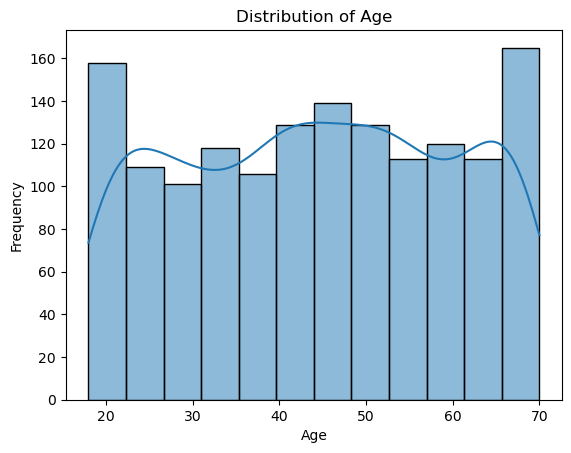

The histogram for 'Age' shows the distribution of ages among customers.If the histogram is right-skewed, it suggests a higher number of younger customers, while a left-skew might indicate an older customer base.


In [109]:
univariate_analysis_numerical(df, 'Age')
print("The histogram for 'Age' shows the distribution of ages among customers.If the histogram is right-skewed, it suggests a higher number of younger customers, while a left-skew might indicate an older customer base.")

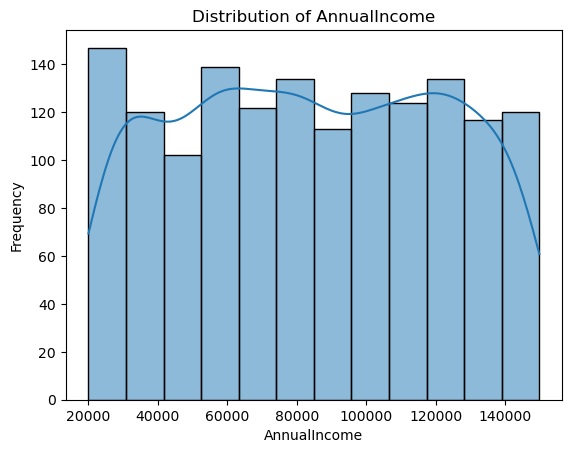

The distribution of 'AnnualIncome' reveals the income range of customers. A right-skew suggests that most customers earn lower incomes, while higher incomes are less common.


In [110]:
univariate_analysis_numerical(df, 'AnnualIncome')
print("The distribution of 'AnnualIncome' reveals the income range of customers. A right-skew suggests that most customers earn lower incomes, while higher incomes are less common.")

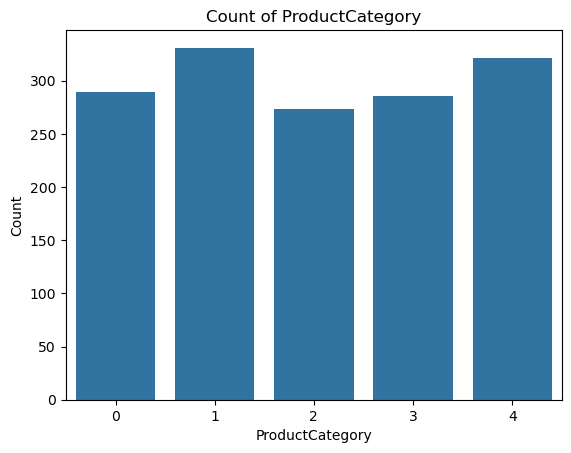

The count plot for 'ProductCategory' shows which categories are most popular. If a particular category dominates, it suggests higher customer interest or sales in that category.


In [111]:
univariate_analysis_categorical(df, 'ProductCategory')
print("The count plot for 'ProductCategory' shows which categories are most popular. If a particular category dominates, it suggests higher customer interest or sales in that category."

)

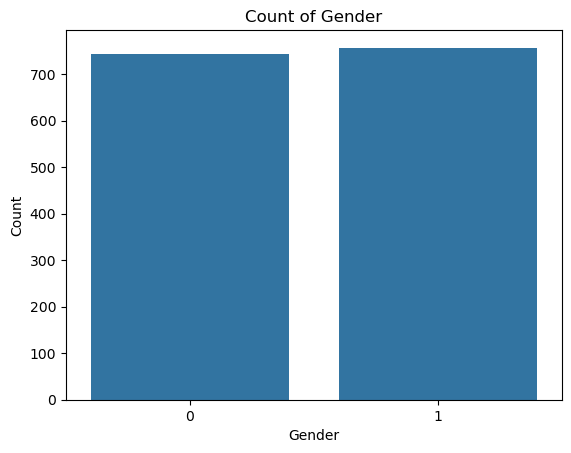

The count plot for 'Gender' shows the gender distribution among customers. If one gender significantly dominates, it may indicate a demographic skew in the customer base.


In [112]:
univariate_analysis_categorical(df, 'Gender')
print( "The count plot for 'Gender' shows the gender distribution among customers. If one gender significantly dominates, it may indicate a demographic skew in the customer base.")

                         Age    Gender  AnnualIncome  NumberOfPurchases  \
Age                 1.000000  0.022055      0.016438          -0.038778   
Gender              0.022055  1.000000      0.010054           0.001373   
AnnualIncome        0.016438  0.010054      1.000000           0.000276   
NumberOfPurchases  -0.038778  0.001373      0.000276           1.000000   
ProductCategory    -0.020767 -0.028572      0.032163           0.006270   
TimeSpentOnWebsite  0.032309  0.012814     -0.001505           0.024644   
LoyaltyProgram     -0.005980  0.033302     -0.045296           0.055358   
DiscountsAvailed    0.004009 -0.056624      0.016393           0.029581   
PurchaseStatus     -0.255747  0.002627      0.188214           0.222691   

                    ProductCategory  TimeSpentOnWebsite  LoyaltyProgram  \
Age                       -0.020767            0.032309       -0.005980   
Gender                    -0.028572            0.012814        0.033302   
AnnualIncome            

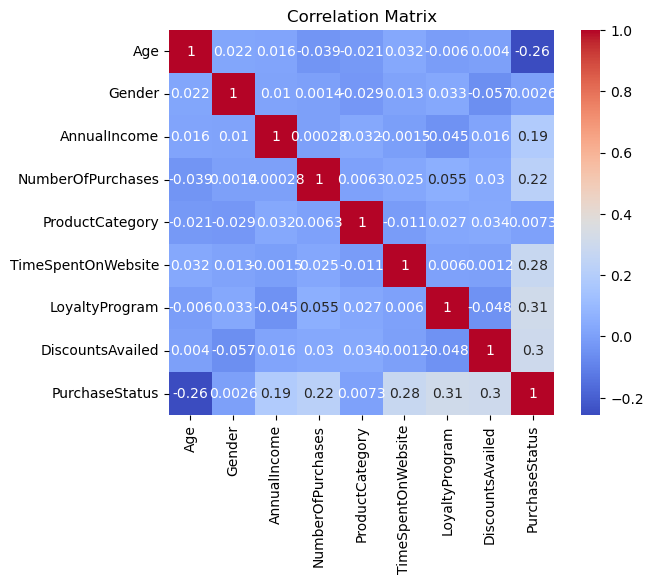

The correlation matrix reveals key relationships between features. Strong positive correlations, such as between AnnualIncome and NumberOfPurchases, indicate that higher-income customers tend to make more purchases. Negative correlations, like between Age and TimeSpentOnWebsite, suggest older customers may spend less time online. The correlations with PurchaseStatus are crucial for identifying the most influential factors in predicting customer purchase behavior. Understanding these relationships helps in refining feature selection for model building and avoiding multicollinearity issues


In [123]:
# Function to create and visualize the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

 # Plotting the heatmap for the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


print("The correlation matrix reveals key relationships between features. Strong positive correlations, such as between AnnualIncome and NumberOfPurchases, indicate that higher-income customers tend to make more purchases. Negative correlations, like between Age and TimeSpentOnWebsite, suggest older customers may spend less time online. The correlations with PurchaseStatus are crucial for identifying the most influential factors in predicting customer purchase behavior. Understanding these relationships helps in refining feature selection for model building and avoiding multicollinearity issues")

## Logistic Regression

In [20]:
X = df[['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']]
y = df['PurchaseStatus']

In [21]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [22]:
X.shape,y.shape

((1500, 8), (1500,))

In [23]:
X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1125, 8), (375, 8), (1125,), (375,))

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
logreg.fit(X_train,y_train)


LogisticRegression()

In [28]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [29]:
y_test

24      1
1348    0
578     0
937     0
1163    1
       ..
488     0
1014    0
1114    0
672     0
1046    0
Name: PurchaseStatus, Length: 375, dtype: int64

In [30]:
from sklearn import metrics

In [31]:
metrics.accuracy_score(y_test, y_pred)

0.6853333333333333

In [32]:
metrics.confusion_matrix(y_test, y_pred)

array([[151,  56],
       [ 62, 106]], dtype=int64)

In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       207
           1       0.65      0.63      0.64       168

    accuracy                           0.69       375
   macro avg       0.68      0.68      0.68       375
weighted avg       0.68      0.69      0.68       375



## Decision Tree Algorithm

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
def mymodel(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(metrics.classification_report(y_test,y_pred))
    return model

In [36]:
dt=DecisionTreeClassifier()

In [37]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       207
           1       0.65      0.63      0.64       168

    accuracy                           0.69       375
   macro avg       0.68      0.68      0.68       375
weighted avg       0.68      0.69      0.68       375



DecisionTreeClassifier()

In [38]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       207
           1       0.65      0.63      0.64       168

    accuracy                           0.69       375
   macro avg       0.68      0.68      0.68       375
weighted avg       0.68      0.69      0.68       375



DecisionTreeClassifier(max_depth=10)

In [39]:
from sklearn.metrics import accuracy_score
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(X_train,y_train)
    ypred=dt2.predict(X_test)
    print(f"{i}: {accuracy_score(y_test,y_pred)}")

1: 0.6853333333333333
2: 0.6853333333333333
3: 0.6853333333333333
4: 0.6853333333333333
5: 0.6853333333333333
6: 0.6853333333333333
7: 0.6853333333333333
8: 0.6853333333333333
9: 0.6853333333333333
10: 0.6853333333333333
11: 0.6853333333333333
12: 0.6853333333333333
13: 0.6853333333333333
14: 0.6853333333333333
15: 0.6853333333333333
16: 0.6853333333333333
17: 0.6853333333333333
18: 0.6853333333333333
19: 0.6853333333333333
20: 0.6853333333333333
21: 0.6853333333333333
22: 0.6853333333333333
23: 0.6853333333333333
24: 0.6853333333333333
25: 0.6853333333333333
26: 0.6853333333333333
27: 0.6853333333333333
28: 0.6853333333333333
29: 0.6853333333333333
30: 0.6853333333333333
31: 0.6853333333333333
32: 0.6853333333333333
33: 0.6853333333333333
34: 0.6853333333333333
35: 0.6853333333333333
36: 0.6853333333333333
37: 0.6853333333333333
38: 0.6853333333333333
39: 0.6853333333333333
40: 0.6853333333333333
41: 0.6853333333333333
42: 0.6853333333333333
43: 0.6853333333333333
44: 0.68533333333333

In [40]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       207
           1       0.65      0.63      0.64       168

    accuracy                           0.69       375
   macro avg       0.68      0.68      0.68       375
weighted avg       0.68      0.69      0.68       375



DecisionTreeClassifier(min_samples_leaf=10)

In [41]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=100,max_depth=3)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       207
           1       0.65      0.63      0.64       168

    accuracy                           0.69       375
   macro avg       0.68      0.68      0.68       375
weighted avg       0.68      0.69      0.68       375



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=100)

## Hyperparameter tuning for logistic regg

In [76]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 10, 11, 12, 18],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [77]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 18],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [78]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}

In [79]:
my_best_preds = grid_search.predict(X_test)

In [80]:
accuracy_score(y_test, my_best_preds)

0.88

## KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn = KNeighborsClassifier(n_neighbors=2)

In [130]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [131]:
pred = knn.predict(X_test)

In [132]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [133]:
print(confusion_matrix(y_test,pred))

[[182  25]
 [130  38]]


In [134]:
print(accuracy_score(y_test,pred))

0.5866666666666667


In [135]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70       207
           1       0.60      0.23      0.33       168

    accuracy                           0.59       375
   macro avg       0.59      0.55      0.52       375
weighted avg       0.59      0.59      0.53       375



In [136]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy_rate.append(score)
    

In [137]:
accuracy_rate

[0.6213333333333333,
 0.5866666666666667,
 0.5866666666666667,
 0.5653333333333334,
 0.5706666666666667,
 0.552,
 0.5653333333333334,
 0.5306666666666666,
 0.52,
 0.528,
 0.5706666666666667,
 0.544,
 0.5653333333333334,
 0.5626666666666666,
 0.5786666666666667,
 0.576,
 0.608,
 0.6,
 0.6,
 0.6026666666666667,
 0.616,
 0.6026666666666667,
 0.6106666666666667,
 0.6106666666666667,
 0.608,
 0.6106666666666667,
 0.6293333333333333,
 0.616,
 0.6213333333333333,
 0.6106666666666667,
 0.616,
 0.6293333333333333,
 0.6346666666666667,
 0.6186666666666667,
 0.6293333333333333,
 0.6186666666666667,
 0.6213333333333333,
 0.6106666666666667,
 0.624]

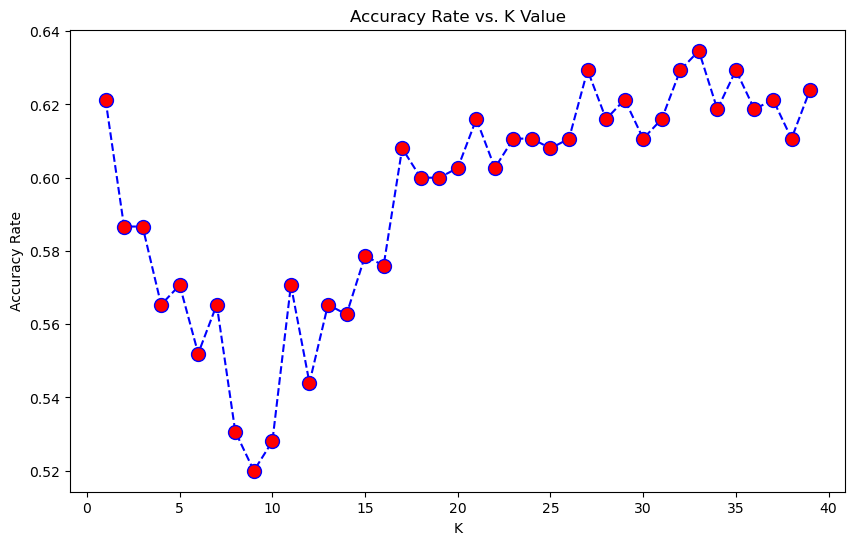

The graph shows how the accuracy rate changes with different values of K in the K-Nearest Neighbors (KNN) algorithm. An optimal K value is one that balances accuracy and generalization, avoiding overfitting or underfitting. Typically, you'll see a peak where accuracy is highest, indicating the best K for your model.


In [138]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

print("The graph shows how the accuracy rate changes with different values of K in the K-Nearest Neighbors (KNN) algorithm. An optimal K value is one that balances accuracy and generalization, avoiding overfitting or underfitting. Typically, you'll see a peak where accuracy is highest, indicating the best K for your model.")

## Hypermeter tuning for  KNN 

In [139]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=2


[[182  25]
 [130  38]]


0.5866666666666667


In [141]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[159  48]
 [ 94  74]]


0.6213333333333333
